# Importing necessary packages

In [24]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Loading the data

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Analyzing the data

In [26]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [27]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
y_train[0]

5

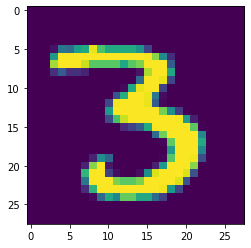

In [32]:
plt.imshow(x_train[12])

# Data Pre-processing

In [33]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [34]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Creating the model

In [36]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

# Training the model

In [37]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [38]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.2370 - accuracy: 0.9501 - val_loss: 0.0790 - val_accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0677 - accuracy: 0.9791 - val_loss: 0.0931 - val_accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0932 - val_accuracy: 0.9772
Epoch 4/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0900 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.1188 - val_accuracy: 0.9753


# Testing the model

In [39]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11884814500808716, 0.9753000140190125]


In [40]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 55ms/step
[[3.44957556e-14 3.69936315e-19 1.02601969e-10 1.85561511e-10
  4.08611454e-19 1.34314817e-17 8.25834658e-24 1.00000000e+00
  1.74188608e-10 1.41743690e-15]
 [3.13432191e-09 4.59903362e-07 9.99999523e-01 4.16911785e-13
  1.25494019e-16 2.46233642e-16 5.83130280e-11 1.00933875e-16
  1.13880249e-12 2.31935578e-14]
 [7.08200026e-11 9.99996662e-01 1.17108846e-06 1.45009681e-11
  1.39837610e-07 1.91770000e-09 6.21811673e-12 8.67392855e-13
  1.98879320e-06 1.29272211e-12]
 [1.00000000e+00 2.53061522e-16 3.63019302e-11 4.77087602e-16
  1.74306397e-16 4.57620798e-14 1.85573543e-10 4.10904947e-17
  2.30485054e-12 1.16816116e-13]]


In [41]:
print(numpy.argmax(prediction, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
